In [1]:
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe
from polyhedral_analysis.octahedral_analysis import isomer_is_cis, isomer_is_fac, isomer_is_mer, isomer_is_trans
from polyhedral_analysis.configuration import Configuration

from pymatgen.core import Structure
from collections import Counter

from itertools import permutations

from figure_formatting import figure_formatting as ff

ff.set_formatting()

colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51',
          'pink': '#F3B6A5'}

from scipy.stats import binom
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
structures = [Structure.from_file(f'../../structure_prediction_dataset/vasp_4x4x4_from_ga/config_{i}/opt.vasp') for i in range(1, 5)]

In [3]:
recipe = PolyhedraRecipe(method='distance cutoff',
                         coordination_cutoff=3.0,
                         central_atoms='Ti',
                         vertex_atoms=['O', 'F'])

In [4]:
configs = [Configuration(structure=s, recipes=[recipe]) for s in structures]

In [5]:
distributions = []
for c in configs:
    distributions.append(Counter([p.vertex_count['F'] for p in c.polyhedra]))
distributions

[Counter({5: 2, 4: 60, 3: 2}),
 Counter({4: 60, 3: 2, 5: 2}),
 Counter({4: 60, 5: 2, 3: 2}),
 Counter({3: 3, 4: 58, 5: 3})]

In [6]:
for c in configs:
    f1 = [p for p in c.polyhedra if p.vertex_count['F'] == 1]
    f0 = [p for p in c.polyhedra if p.vertex_count['F'] == 0]
    f2 = [p for p in c.polyhedra if p.vertex_count['F'] == 2]
    f3 = [p for p in c.polyhedra if p.vertex_count['F'] == 3]
    f4 = [p for p in c.polyhedra if p.vertex_count['F'] == 4]
    f5 = [p for p in c.polyhedra if p.vertex_count['F'] == 5]
    f6 = [p for p in c.polyhedra if p.vertex_count['F'] == 6]
    
    n_F2_trans = sum([isomer_is_trans(p, check=False) for p in f2])
    n_F3_mer = sum([isomer_is_mer(p, check=False) for p in f3])
    n_F4_trans = sum([isomer_is_trans(p, check=False) for p in f4])
    
    print(f'[{len(f0)}] [{len(f1)}] [{n_F2_trans} {len(f2)-n_F2_trans}] [{n_F3_mer} {len(f3)-n_F3_mer}] [{n_F4_trans} {len(f4)-n_F4_trans}] [{len(f5)}] [{len(f6)}]')

[0] [0] [0 0] [0 2] [0 60] [2] [0]
[0] [0] [0 0] [0 2] [0 60] [2] [0]
[0] [0] [0 0] [0 2] [0 60] [2] [0]
[0] [0] [0 0] [0 3] [0 58] [3] [0]


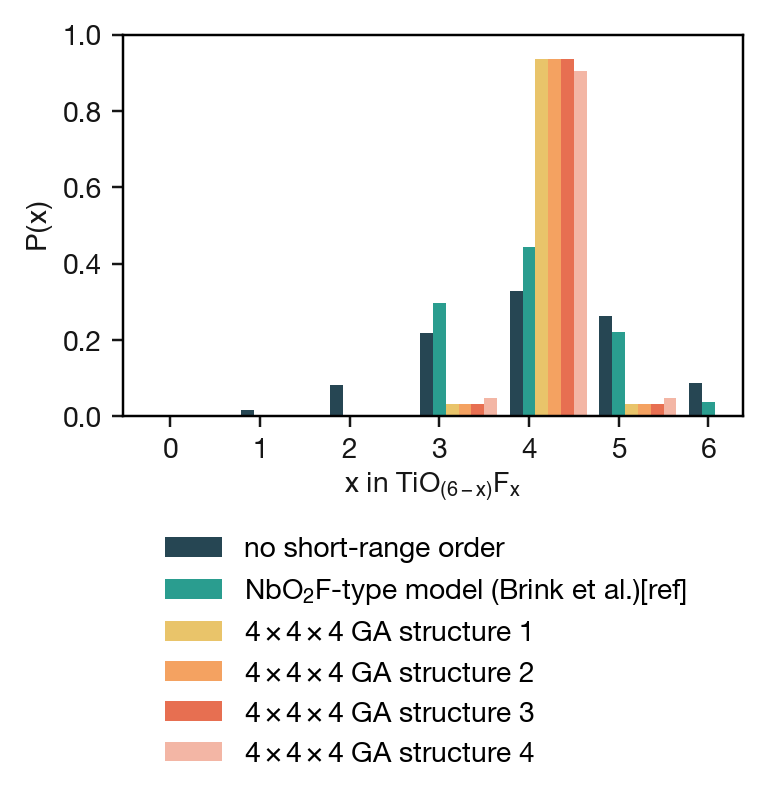

In [7]:
n = 6
p = 2/3
x = np.arange(0,7)
# probabilities of TiO1-xFx coordination for the Brink model → see Brink et al. J. Sol. Stat. Chem 2002.
brink = np.array([[0,1,2,3,4,5,6],
                  [0.0, 0.0, 0.0, 8/27, 12/27, 6/27, 1/27]]) 

GA_colours = [colors['yellow'],
              colors['light orange'],
              colors['dark orange'],
              colors['pink']]
width = 1/7
# plot.bar(r1, a1, width=width1)
plt.bar(x-width, binom.pmf(x, n, p), label='no short-range order', width=width, color=colors['blue'])
plt.bar(brink[0], brink[1], label=r'NbO$_2$F-type model (Brink et al.)[ref]', width=width, color=colors['green'])
for i, d in enumerate(distributions, 1):
    dist_array = np.array(sorted([(k, v) for k, v in d.items()])).T
    plt.bar(dist_array[0]+width*i, dist_array[1]/sum(dist_array[1]), label=r'$4\times4\times4$ GA structure '+f'{i}',
            width=width, color=GA_colours[i-1])

plt.legend(loc=(0.05,-0.95))
plt.xlabel(r'$x$ in TiO$_{(6-x)}$F$_x$')
plt.ylabel(r'$P(x)$')
plt.ylim(0,1)
# plt.tight_layout()
plt.savefig('../Figures/4x4x4_ocathedra_vs_Brink.pdf')
plt.show()